Perez Bikes Prediction Application 

In [78]:
# @hidden_cell 
import pandas as pd
import numpy as np
import os
import psycopg2 as ps
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
from datetime import datetime
import sqlalchemy as sqla

In [79]:
connection = ps.connect(dbname="Perez Bikes",
                       user = "postgres",
                       password = "superman94",
                       host = "localhost",
                       port = "5432")

In [80]:
pred = pd.read_sql_query('''SELECT * FROM PREDICTION;''', connection)

C:\Users\maris\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [81]:
# returns the quantity sold per day of all bikes 
b_per_day = pd.read_sql_query('''SELECT order_date, COUNT(quantity) FROM PREDICTION GROUP BY order_date ORDER BY order_date;''', connection)
b_per_day["order_date"] = pd.to_datetime(b_per_day["order_date"])
b_per_day['year_week'] = b_per_day['order_date'].dt.isocalendar().week
b_per_day['year'] = b_per_day['order_date'].dt.isocalendar().year
b_per_day

C:\Users\maris\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,order_date,count,year_week,year
0,2011-01-07,2,1,2011
1,2011-01-10,7,2,2011
2,2011-01-11,9,2,2011
3,2011-01-12,16,2,2011
4,2011-01-17,6,3,2011
...,...,...,...,...
957,2015-12-18,2,51,2015
958,2015-12-22,24,52,2015
959,2015-12-23,34,52,2015
960,2015-12-24,1,52,2015


In [82]:
# add a column to the pred table that contains the week of the year and year of the order 
pred["order_date"] = pd.to_datetime(pred["order_date"])
pred['year_week'] = pred['order_date'].dt.isocalendar().week
pred['year'] = pred['order_date'].dt.isocalendar().year
pred

,order_id,order_date,product_id,quantity,bike,model,year_week,year
0,1,2011-01-07,48,1,48,Jekyll Carbon 2,1,2011
1,1,2011-01-07,52,1,52,Trigger Carbon 2,1,2011
2,2,2011-01-10,76,1,76,Beast of the East 1,2,2011
3,2,2011-01-10,52,1,52,Trigger Carbon 2,2,2011
4,3,2011-01-10,2,1,2,Supersix Evo Hi-Mod Team,2,2011
...,...,...,...,...,...,...,...,...
15639,2000,2015-12-25,14,1,14,CAAD Disc Ultegra,52,2015
15640,2000,2015-12-25,90,1,90,Trail 2,52,2015
15641,2000,2015-12-25,17,1,17,CAAD12 105,52,2015
15642,2000,2015-12-25,70,1,70,F-Si Carbon 4,52,2015


In [83]:
import ipywidgets as w    

In [84]:
# create a tab menu for ts graphs 
%matplotlib inline
from IPython.display import clear_output
 
# output variables
op11 = w.Output()
op12 = w.Output()
op13 = w.Output()
op14 = w.Output()
op15 = w.Output()


# tab setup 
tab = w.Tab(children = [op11, op12, op13, op14, op15])
tab.set_title(0,'2011')
tab.set_title(1, '2012')
tab.set_title(2, '2013')
tab.set_title(3, '2014')
tab.set_title(4, '2015')
display(tab)


# output commands 
with op11:
    clear_output(wait=True)
    fig1, ax1 = plt.subplots()
    ts_2011 = b_per_day.loc[(b_per_day['year'] == 2011)]
    ts2011_plot = ax1.plot(ts_2011['year_week'], ts_2011['count'])
    plt.title('2011')
    ax1.set_ylabel('Quantity')
    ax1.set_xlabel('Week')
    plt.show(fig1)
    
with op12:
    fig1, ax2 = plt.subplots()
    ts_2012 = b_per_day.loc[(b_per_day['year'] == 2012)]
    ts_2012_plot = ax2.plot(ts_2012['year_week'], ts_2012['count'])
    plt.title('2012')
    ax2.set_ylabel('Quantity')
    ax2.set_xlabel('Week')
    plt.show(fig1)

    
with op13:
    fig1, ax3 = plt.subplots()
    ts_2013 = b_per_day.loc[(b_per_day['year'] == 2013)]
    ts_2013_plot = ax3.plot(ts_2013['year_week'], ts_2013['count'])
    plt.title('2013')
    ax3.set_ylabel('Quantity')
    ax3.set_xlabel('Week')
    plt.show(fig1)
    
with op14:
    fig4, ax4 = plt.subplots()
    ts_2014 = b_per_day.loc[(b_per_day['year'] == 2014)]
    ts_2014_plot = ax4.plot(ts_2014['year_week'], ts_2014['count'])
    plt.title('2014')
    ax4.set_ylabel('Quantity')
    ax4.set_xlabel('Week')
    plt.show(fig4)

with op15:
    fig5, ax5 = plt.subplots()
    ts_2015 = b_per_day.loc[(b_per_day['year'] == 2015)]
    ts_2015_plot = ax5.plot(ts_2015['year_week'], ts_2015['count'])
    plt.title('2015')
    ax5.set_ylabel('Quantity')
    ax5.set_xlabel('Week')
    plt.show(fig5)
    
# close all figures
plt.close()

In [85]:
# XY scatter plot (x: customer id, y: number of bikes per transaction)
xy_table = pd.read_sql_query('''SELECT customer_id, COUNT(quantity) FROM orders_updated GROUP BY customer_id;''', connection)

C:\Users\maris\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='customer_id', ylabel='count'>

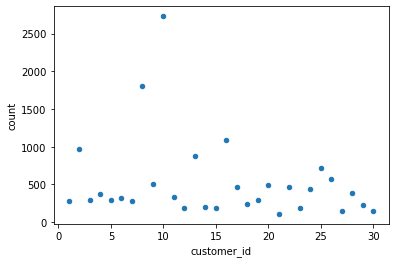

In [86]:
xy_table.plot.scatter(x='customer_id', y='count')

C:\Users\maris\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


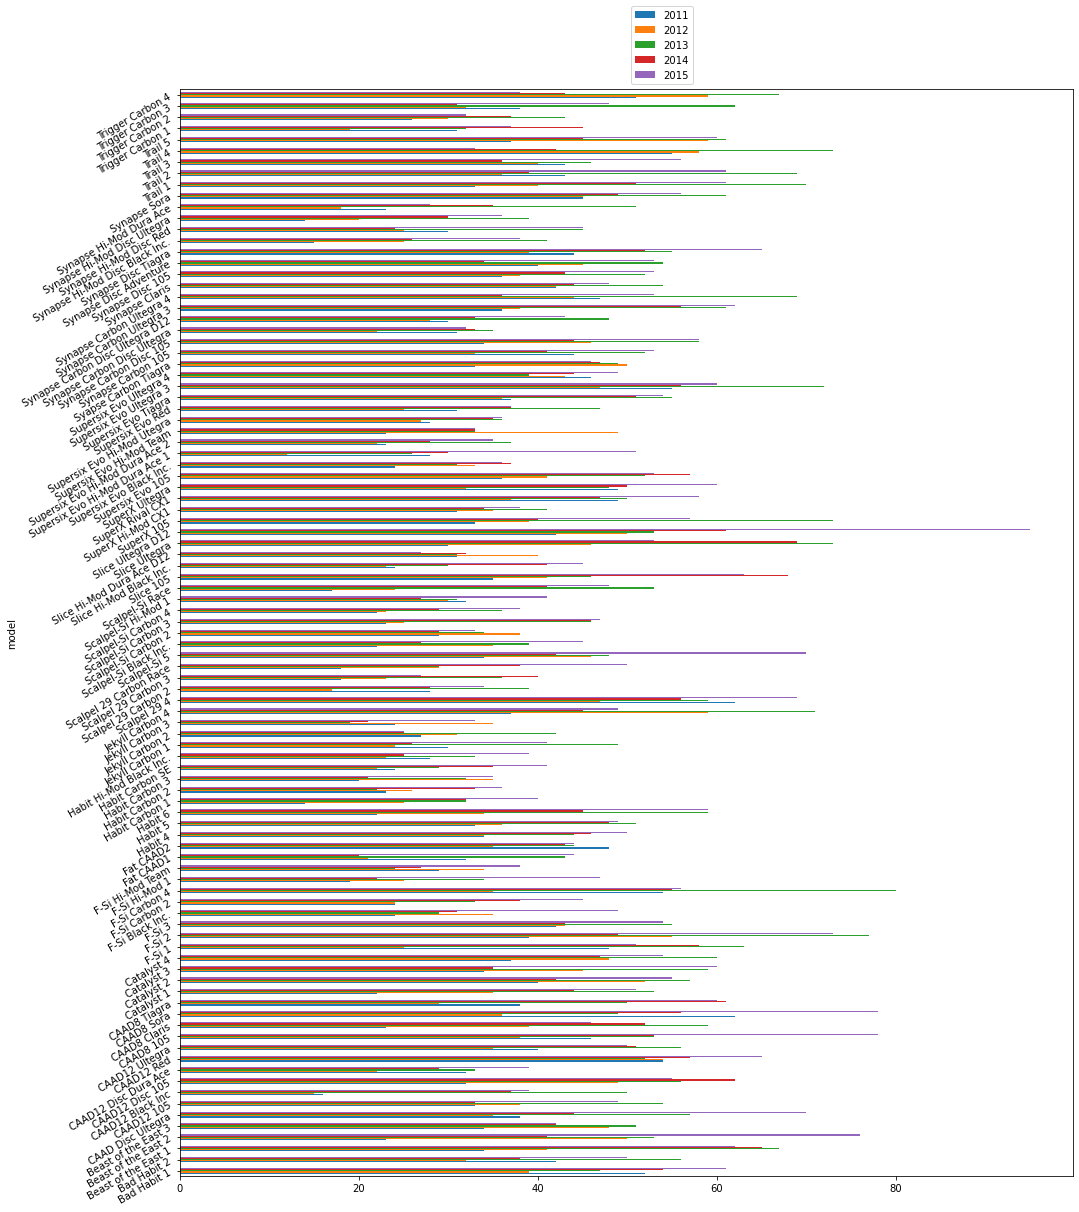

In [87]:
# bar graph (y: the amount of that bike sold that week, x: model name of bike)
# [bike.id should be transformed here to make it easier to read]
bar_graph = pd.read_sql_query('''SELECT model, order_date, quantity FROM prediction''', connection)
bar_graph['order_date'] = pd.to_datetime(bar_graph["order_date"])
bar_graph['year_week'] = bar_graph['order_date'].dt.isocalendar().week
bar_graph['year'] = bar_graph['order_date'].dt.isocalendar().year
bar_graph.groupby(['year','model']).count()
bg_update=bar_graph.drop(columns=['order_date', 'year_week'], axis = 1)
bg_pivot = bg_update.pivot_table(index='model', columns= 'year', values='quantity', aggfunc='sum')
bg_pivot.plot.barh(figsize=(16,20))
plt.yticks(fontsize=10, rotation=30)
plt.legend(bbox_to_anchor=(0.5,1))

In [88]:
# linear regression algorithm 
# args should be two dates: following monday and next saturday
# function should return an array: [bike 1's name : quantity; b2 : q; b3 : q]
import xgboost as xgb

In [89]:
import sklearn

In [90]:
# cleaning data to prep for algorithm
xgb_table = pred.drop(['order_id', 'order_date'], axis=1)

In [91]:
xgb_table = xgb_table[['product_id', 'model', 'quantity', 'year_week', 'year']]
xgb_table

,product_id,model,quantity,year_week,year
0,48,Jekyll Carbon 2,1,1,2011
1,52,Trigger Carbon 2,1,1,2011
2,76,Beast of the East 1,1,2,2011
3,52,Trigger Carbon 2,1,2,2011
4,2,Supersix Evo Hi-Mod Team,1,2,2011
...,...,...,...,...,...
15639,14,CAAD Disc Ultegra,1,52,2015
15640,90,Trail 2,1,52,2015
15641,17,CAAD12 105,1,52,2015
15642,70,F-Si Carbon 4,1,52,2015


In [92]:
# sorting the above table 
xgb_groupby = xgb_table.groupby(['year', 'year_week', 'product_id']).sum().reset_index()
xgb_groupby

,year,year_week,product_id,quantity
0,2011,1,48,1
1,2011,1,52,1
2,2011,2,1,1
3,2011,2,2,2
4,2011,2,4,1
...,...,...,...,...
11338,2015,52,90,3
11339,2015,52,91,1
11340,2015,52,92,1
11341,2015,52,95,1


In [93]:
X = xgb_groupby['product_id']
y = xgb_groupby['quantity']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
import numpy as np

In [98]:
# convert X_train to a 2D array 
X_train.to_numpy()
X_train

6361     72
10035    41
9274     91
6937     87
6707     46
         ..
4859     68
3264     54
9845     87
10799     8
2732     89
Name: product_id, Length: 7940, dtype: int64

In [99]:
X_train = np.array(X_train).reshape(-1,1)

In [108]:
# converting X_test to a 2D array 
X_test.to_numpy()
X_test = np.array(X_test).reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [109]:
# linear regression method
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_pred= lr.predict(X_test)

In [110]:
from sklearn import metrics

In [111]:
print("MAE: ", metrics.mean_absolute_error(y_test, Y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, Y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE:  0.9236829940939005
MSE:  1.8827974681836008
RMSE:  1.3721506725515245


In [112]:
# XGBoost method 
xgb_regressor = xgb.XGBRegressor(booster = 'gblinear')
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [113]:
xgb_pred = xgb_regressor.predict(X_test)

In [114]:
print("RSME: ", np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RSME:  1.3721511368304014


In [118]:
xgb_pred

array([[38],
       [29],
       [73],
       ...,
       [69],
       [96],
       [90]], dtype=int64)